# **Preamable**

What?
Problem Statement
HoW?
what you did to solve it?
Dataset Explaination
Dataset loading.

Project Submission using GitHub
Repository name: your name_projectnamedsprojectfa24 must

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Taxi_Trips__2013-2023_ (1).csv")

In [ ]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,2456abbd77d39361183d4189599999b266e975da,774404e103b0efff86c009f1f384bff4e09c0aba9d20f6...,03/31/2021 03:00:00 PM,03/31/2021 03:30:00 PM,1699.0,11.05,NaN,NaN,8.0,61.0,...,0.0,30.25,Prcard,Flash Cab,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.809018,-87.659167,POINT (-87.6591665992 41.8090182499)
1,96ef687cc7adcb432f34ed0267f0d3405f073234,c1f533318f8480a59173a9728ea0248c0d3eb187f4b897...,04/02/2014 08:30:00 AM,04/02/2014 08:30:00 AM,0.0,0.00,NaN,NaN,NaN,NaN,...,0.0,7.50,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
2,d5307cd921b4edc5038ba79c163c5a7f3f642a6a,dd44f2759f7aeb03f89d7c29d03a7268d80c4e193d555f...,07/11/2014 10:00:00 AM,07/11/2014 10:15:00 AM,780.0,3.30,NaN,NaN,NaN,NaN,...,1.0,11.85,Cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,246d363a62dfb9b9573cb31a0e8251d52f864225,8de0e6d62efb41e049bcc13474cd662275376b7fbdc435...,03/31/2021 02:00:00 PM,03/31/2021 02:45:00 PM,2160.0,1.00,1.703198e+10,1.703128e+10,76.0,28.0,...,5.0,53.25,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.879255,-87.642649,POINT (-87.642648998 41.8792550844)
4,2470347ef545fad85ab54cc1c9918126b3e1c25f,3ec761bcbdf1b66135e7f4bf23e1b100d6e4f933e32a76...,03/31/2021 05:00:00 PM,03/31/2021 05:15:00 PM,840.0,0.50,NaN,NaN,41.0,41.0,...,0.0,8.25,Cash,Taxi Affiliation Services,41.794090,-87.592311,POINT (-87.592310855 41.794090253),41.794090,-87.592311,POINT (-87.592310855 41.794090253)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108460 entries, 0 to 108459
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     108460 non-null  object 
 1   Taxi ID                     108426 non-null  object 
 2   Trip Start Timestamp        108460 non-null  object 
 3   Trip End Timestamp          108424 non-null  object 
 4   Trip Seconds                107828 non-null  float64
 5   Trip Miles                  108455 non-null  float64
 6   Pickup Census Tract         21334 non-null   float64
 7   Dropoff Census Tract        21022 non-null   float64
 8   Pickup Community Area       86039 non-null   float64
 9   Dropoff Community Area      82491 non-null   float64
 10  Fare                        108439 non-null  float64
 11  Tips                        108439 non-null  float64
 12  Tolls                       107113 non-null  float64
 13  Extras        

After preprocessing

In [ ]:
import pandas as pd
import numpy as np

# Assuming your dataset is loaded into a DataFrame called df
# df = pd.read_csv('your_data.csv')  # Example if you're loading a CSV

# 1. Convert 'Trip Start Timestamp' and 'Trip End Timestamp' to datetime format
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp'], errors='coerce')
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp'], errors='coerce')

# 2. Handle missing values
# 2.1. For numeric columns, fill NaN with appropriate values (e.g., median, zero, or forward fill)
df['Trip Seconds'].fillna(df['Trip Seconds'].median(), inplace=True)
df['Trip Miles'].fillna(df['Trip Miles'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Tips'].fillna(0, inplace=True)  # Assuming no tip is 0
df['Tolls'].fillna(0, inplace=True)  # Assuming no tolls are 0
df['Extras'].fillna(0, inplace=True)  # Assuming no extra charges are 0
df['Trip Total'].fillna(df['Trip Total'].median(), inplace=True)
df['Pickup Census Tract'].fillna('Unknown', inplace=True)
df['Dropoff Census Tract'].fillna('Unknown', inplace=True)
df['Pickup Community Area'].fillna('Unknown', inplace=True)
df['Dropoff Community Area'].fillna('Unknown', inplace=True)
df['Payment Type'].fillna('Unknown', inplace=True)
df['Company'].fillna('Unknown', inplace=True)

# 2.2. For categorical columns (e.g., 'Company', 'Payment Type'), handle missing values by filling with 'Unknown' or 'Other'
df['Company'].fillna('Unknown', inplace=True)
df['Payment Type'].fillna('Unknown', inplace=True)

# 3. Convert numeric columns to appropriate data types
df['Trip Seconds'] = df['Trip Seconds'].astype(float)
df['Trip Miles'] = df['Trip Miles'].astype(float)
df['Fare'] = df['Fare'].astype(float)
df['Tips'] = df['Tips'].astype(float)
df['Tolls'] = df['Tolls'].astype(float)
df['Extras'] = df['Extras'].astype(float)
df['Trip Total'] = df['Trip Total'].astype(float)

# 4. Handle outliers (e.g., negative or zero trip durations, miles, etc.)
df = df[df['Trip Seconds'] > 0]  # Remove trips with zero or negative duration
df = df[df['Trip Miles'] >= 0]   # Remove trips with negative miles
df = df[df['Fare'] >= 0]         # Remove trips with negative fare

# 5. Feature Engineering
# 5.1. Extract time of day, day of the week, and other features from timestamps
df['Trip Start Hour'] = df['Trip Start Timestamp'].dt.hour
df['Trip Start Day'] = df['Trip Start Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['Trip Duration'] = (df['Trip End Timestamp'] - df['Trip Start Timestamp']).dt.total_seconds()  # in seconds
df['Trip Day'] = df['Trip Start Timestamp'].dt.date

# 5.2. If needed, create 'Weekend' and 'Weekday' columns
df['Is Weekend'] = df['Trip Start Day'].isin([5, 6])  # 5=Saturday, 6=Sunday

# 6. Check for duplicates and drop them if any
df.drop_duplicates(inplace=True)

# 7. Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# 8. Optional: Save cleaned data to a new CSV
# df.to_csv('cleaned_data.csv', index=False)

# Display the cleaned dataset info




In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103814 entries, 0 to 103813
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip ID                     103814 non-null  object        
 1   Taxi ID                     103810 non-null  object        
 2   Trip Start Timestamp        103814 non-null  datetime64[ns]
 3   Trip End Timestamp          103777 non-null  datetime64[ns]
 4   Trip Seconds                103814 non-null  float64       
 5   Trip Miles                  103814 non-null  float64       
 6   Pickup Census Tract         103814 non-null  object        
 7   Dropoff Census Tract        103814 non-null  object        
 8   Pickup Community Area       103814 non-null  object        
 9   Dropoff Community Area      103814 non-null  object        
 10  Fare                        103814 non-null  float64       
 11  Tips                        103814 non-

In [ ]:
print(df.head())

                                    Trip ID  \
0  2456abbd77d39361183d4189599999b266e975da   
1  d5307cd921b4edc5038ba79c163c5a7f3f642a6a   
2  246d363a62dfb9b9573cb31a0e8251d52f864225   
3  2470347ef545fad85ab54cc1c9918126b3e1c25f   
4  2477c00420b0bdc1afc106ae685b10862b1fd8e0   

                                             Taxi ID Trip Start Timestamp  \
0  774404e103b0efff86c009f1f384bff4e09c0aba9d20f6...  2021-03-31 15:00:00   
1  dd44f2759f7aeb03f89d7c29d03a7268d80c4e193d555f...  2014-07-11 10:00:00   
2  8de0e6d62efb41e049bcc13474cd662275376b7fbdc435...  2021-03-31 14:00:00   
3  3ec761bcbdf1b66135e7f4bf23e1b100d6e4f933e32a76...  2021-03-31 17:00:00   
4  52b413067437984fbc09298bfd9f8c6a7ad9465fb071ae...  2021-03-31 07:15:00   

   Trip End Timestamp  Trip Seconds  Trip Miles Pickup Census Tract  \
0 2021-03-31 15:30:00        1699.0       11.05             Unknown   
1 2014-07-11 10:15:00         780.0        3.30             Unknown   
2 2021-03-31 14:45:00        2160.0      

In [ ]:
df.describe()

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Trip Start Hour,Trip Start Day,Trip Duration
count,103814,103777,103814.000000,103814.000000,103814.000000,103814.000000,103814.000000,103814.000000,103814.000000,83467.000000,83467.000000,80620.000000,80620.000000,103814.000000,103814.000000,103777.000000
mean,2020-04-28 15:18:48.394050560,2020-04-28 17:26:04.352409344,1048.031422,4.790903,17.604529,1.399539,0.003074,1.469236,20.561496,41.897203,-87.674433,41.893869,-87.658467,13.587512,3.183761,1067.716353
min,2013-10-16 14:45:00,2013-10-16 15:15:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625,0.000000,0.000000,-14400.000000
25%,2020-02-29 15:45:00,2020-02-29 16:00:00,394.000000,0.610000,6.500000,0.000000,0.000000,0.000000,7.750000,41.878866,-87.670167,41.874005,-87.663518,10.000000,1.000000,0.000000
50%,2020-08-13 11:30:00,2020-08-13 11:45:00,717.000000,1.900000,10.750000,0.000000,0.000000,0.000000,12.450000,41.899602,-87.635760,41.899602,-87.637844,14.000000,4.000000,900.000000
75%,2020-08-30 10:45:00,2020-08-30 11:00:00,1320.000000,7.010000,25.000000,2.000000,0.000000,1.000000,27.000000,41.944227,-87.625192,41.927261,-87.625192,18.000000,5.000000,1800.000000
max,2023-11-28 07:00:00,2023-11-28 07:00:00,86340.000000,324.100000,8002.070000,200.000000,75.000000,181.000000,8002.470000,42.021224,-87.534903,42.021224,-87.534903,23.000000,6.000000,507600.000000
std,NaN,NaN,2181.003680,6.686098,42.368643,3.157552,0.248136,5.213319,44.132178,0.063440,0.087102,0.061843,0.060586,5.565262,2.118832,3482.673223


2. Exploratory Data Analysis (EDA)
Step 2: Exploratory Data Analysis (EDA)
We will focus on:

Univariate Analysis (Distribution of individual variables).
Bivariate Analysis (Relationships between pairs of variables).
Multivariate Analysis (Exploring relationships between more than two variables).

2.1.1 Numerical Variables

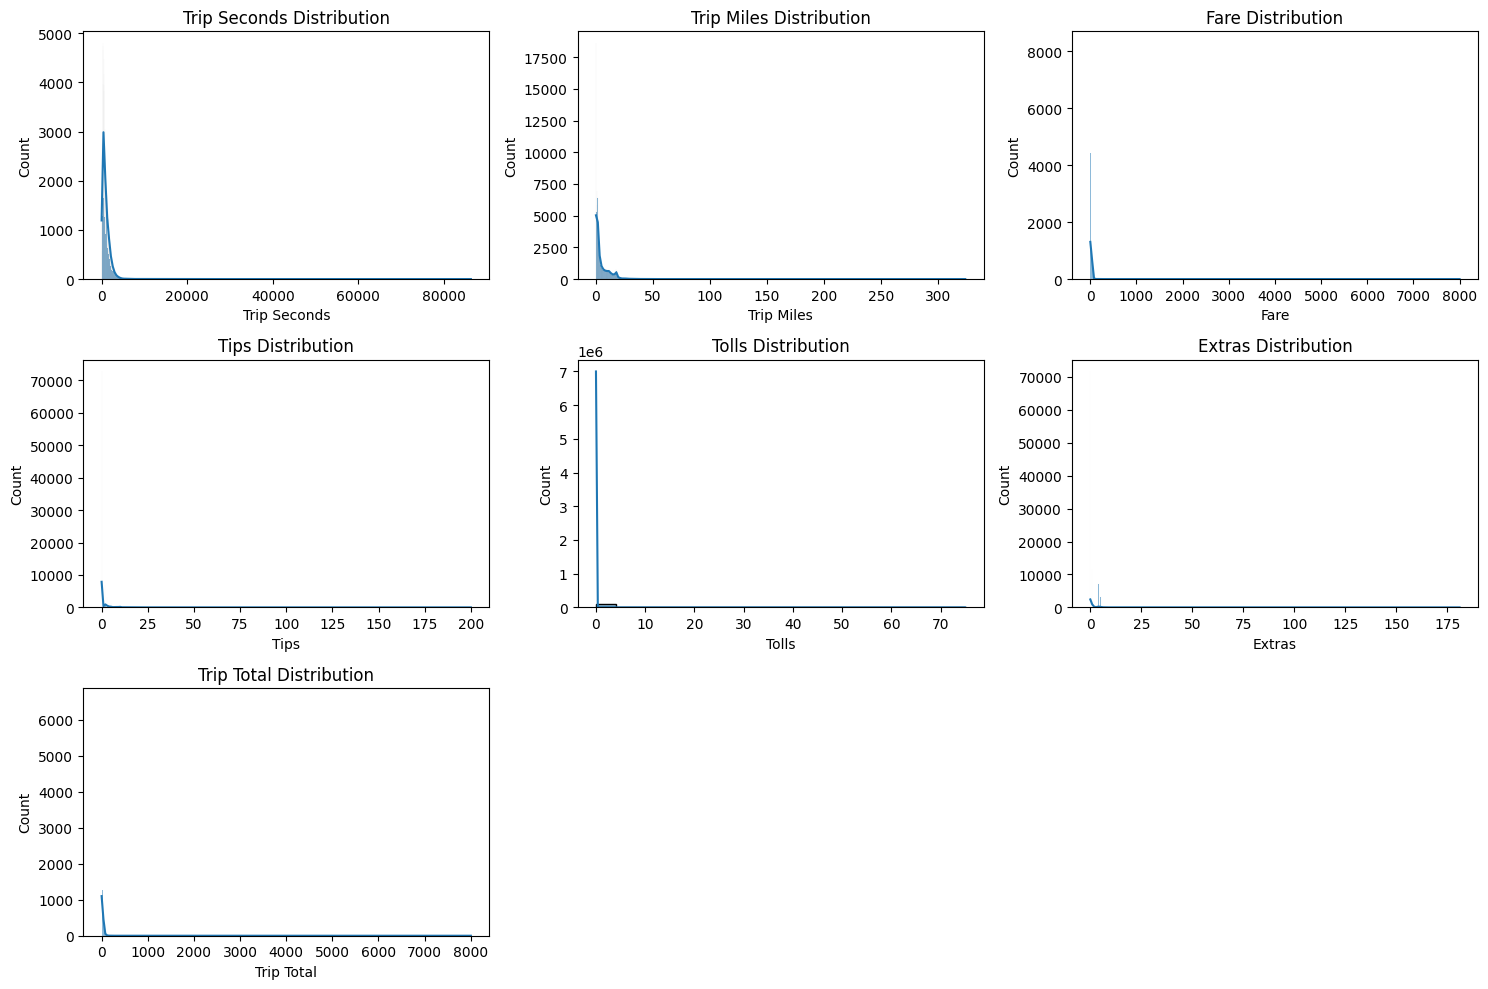

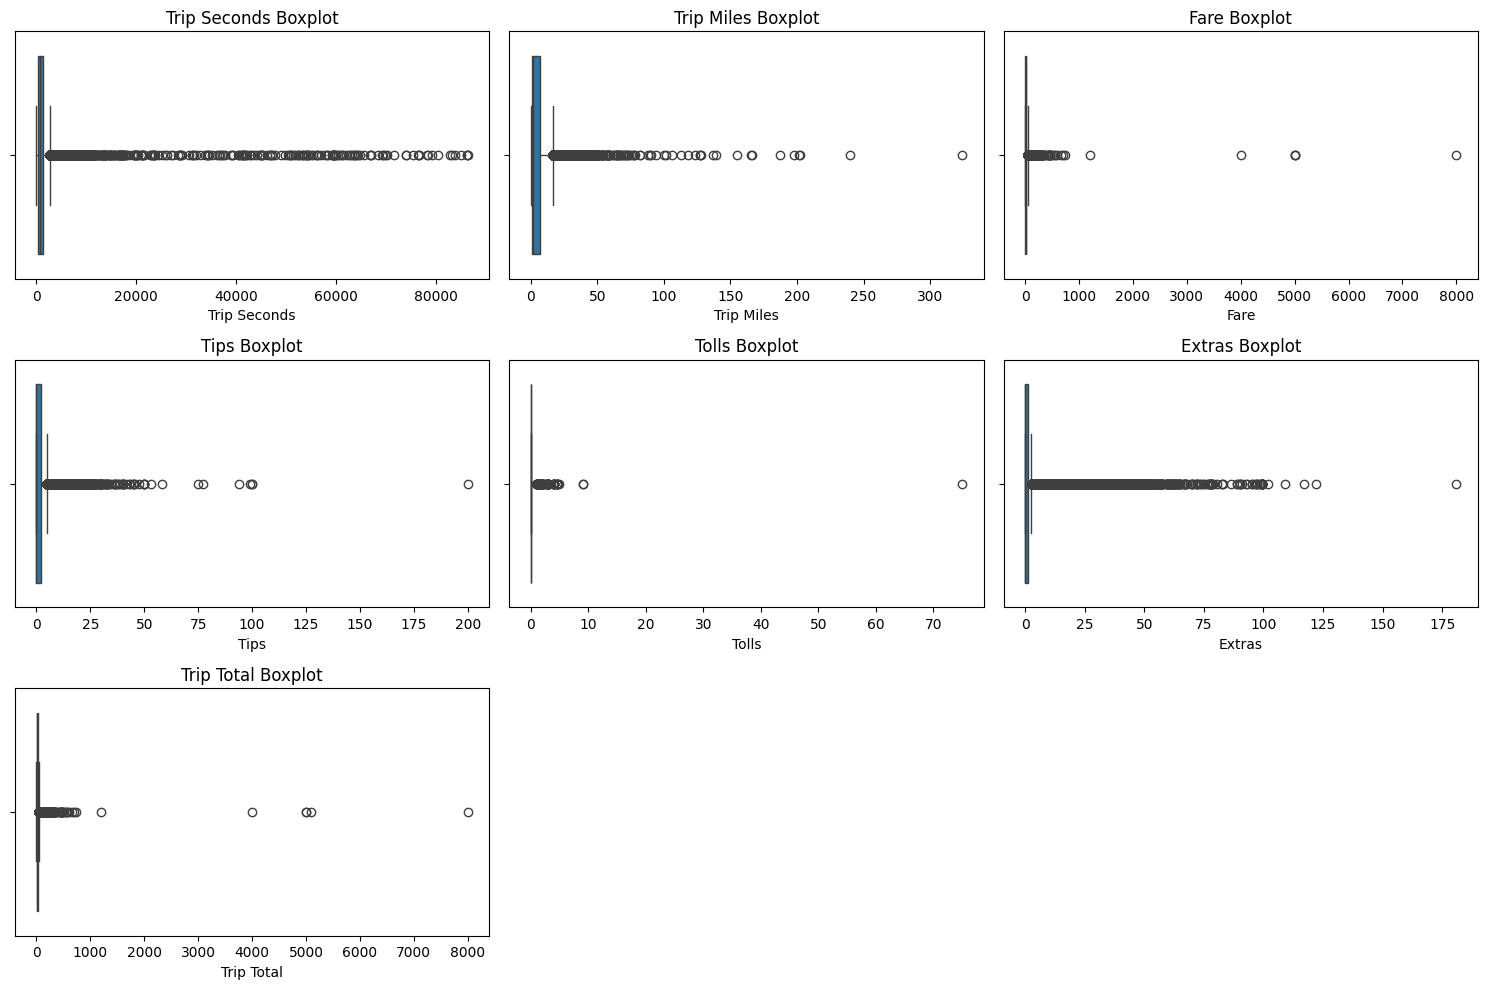

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total
count,103814.000000,103814.000000,103814.000000,103814.000000,103814.000000,103814.000000,103814.000000
mean,1048.031422,4.790903,17.604529,1.399539,0.003074,1.469236,20.561496
std,2181.003680,6.686098,42.368643,3.157552,0.248136,5.213319,44.132178
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,394.000000,0.610000,6.500000,0.000000,0.000000,0.000000,7.750000
50%,717.000000,1.900000,10.750000,0.000000,0.000000,0.000000,12.450000
75%,1320.000000,7.010000,25.000000,2.000000,0.000000,1.000000,27.000000
max,86340.000000,324.100000,8002.070000,200.000000,75.000000,181.000000,8002.470000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_columns = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total']

# Create subplots for each numerical variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    # Use 'df' instead of 'data' to access the DataFrame
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    # Use 'df' instead of 'data' to access the DataFrame
    sns.boxplot(x=df[column])
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()

# Descriptive statistics to get insights
# Use 'df' instead of 'data' to access the DataFrame
df[numerical_columns].describe()

2.1.2 Categorical Variables

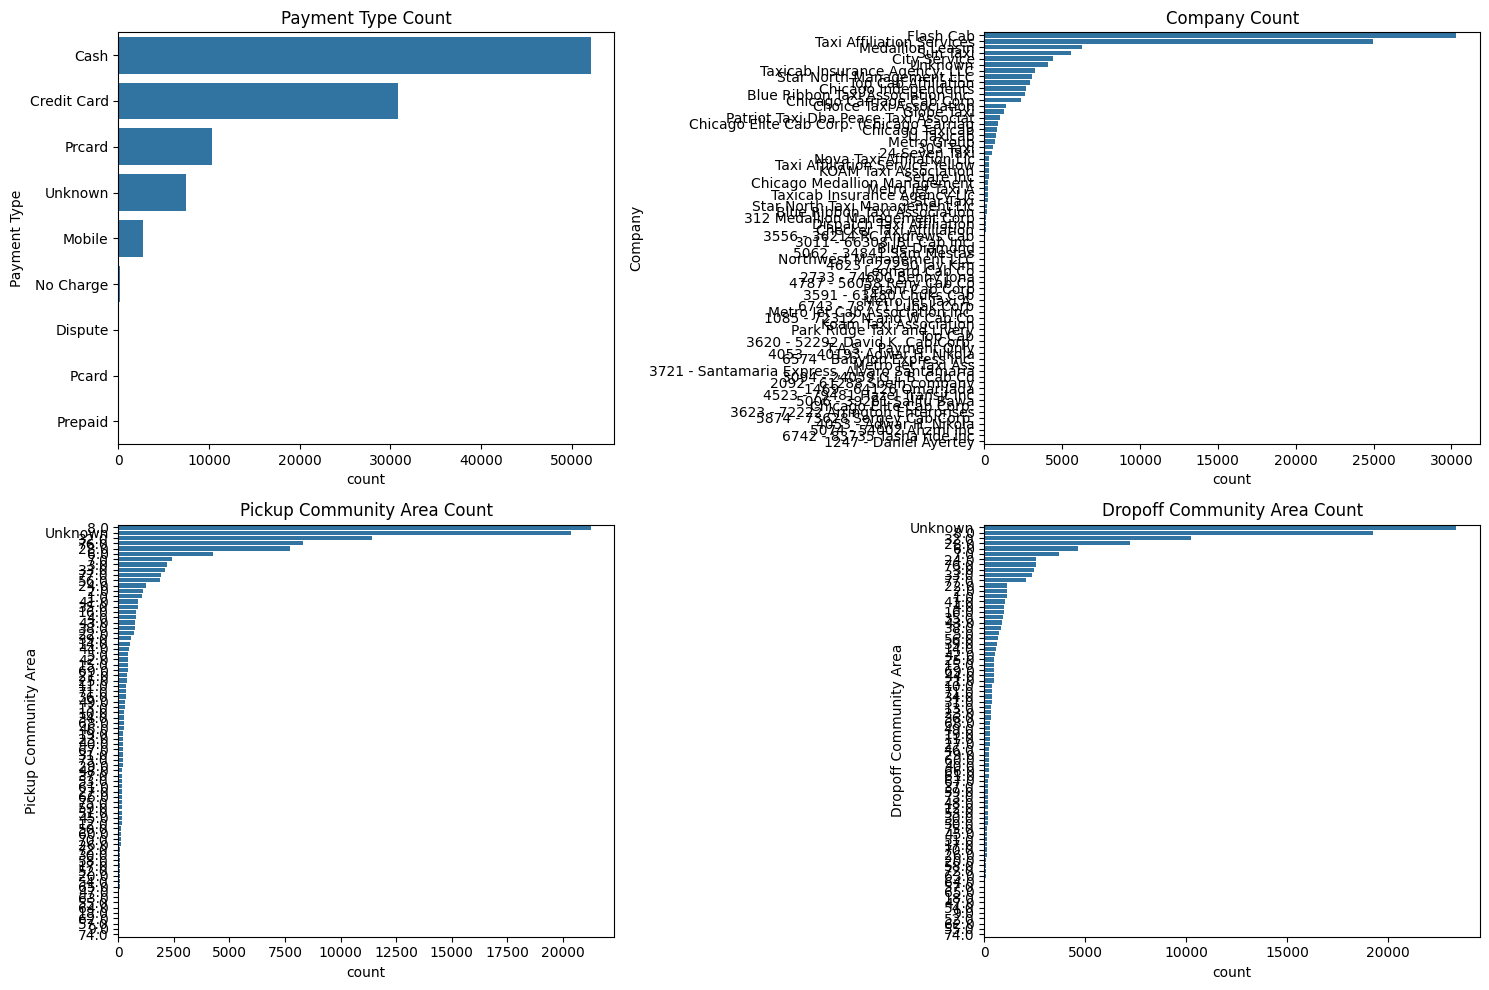

In [ ]:
# Categorical columns to visualize
categorical_columns = ['Payment Type', 'Company', 'Pickup Community Area', 'Dropoff Community Area']

# Plot count of each category in the categorical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    # Use 'df' instead of 'data' to access the DataFrame
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'{column} Count')

plt.tight_layout()
plt.show()

2.2 Bivariate Analysis

2.2.1 Numerical vs Numerical Relationships

Goals:

Visualize the relationships using scatter plots.
Explore correlation using heatmaps and pair plots.
python
Copy code


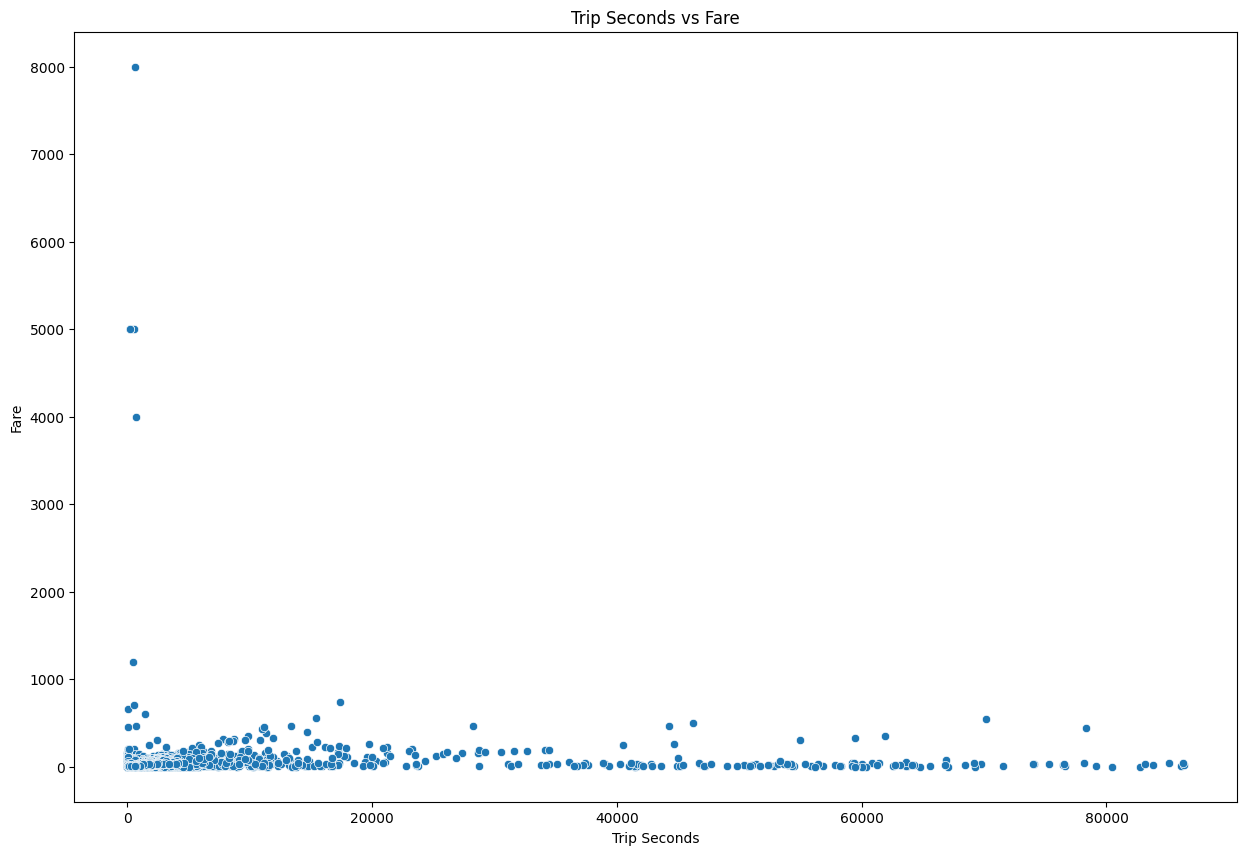

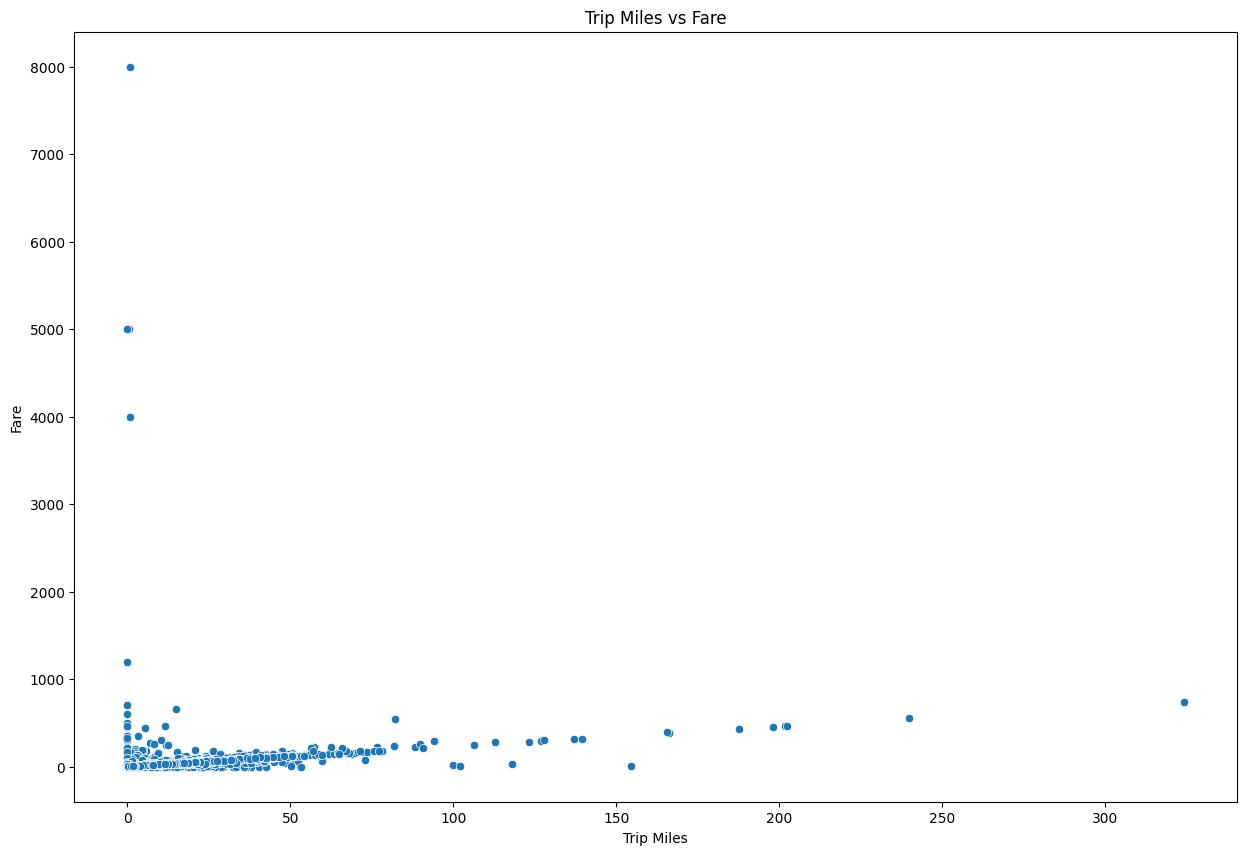

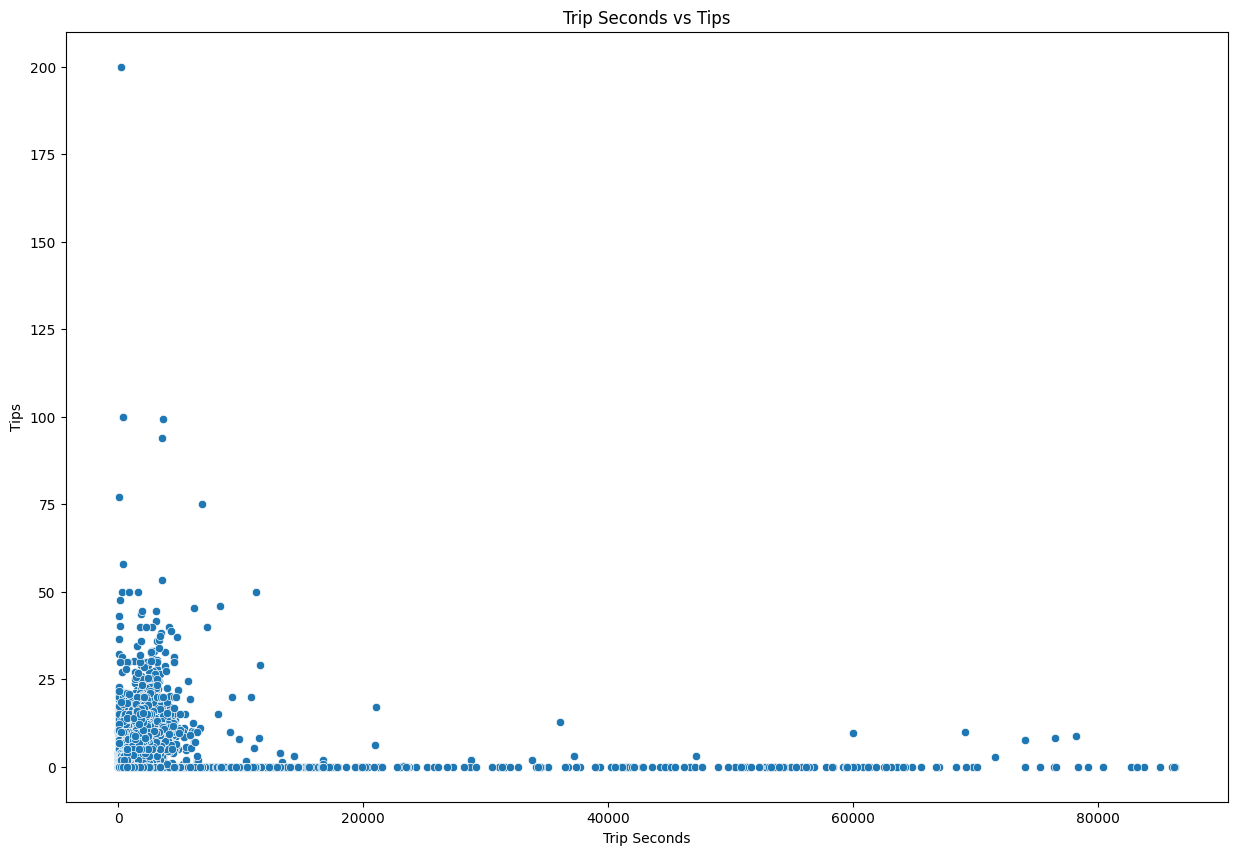

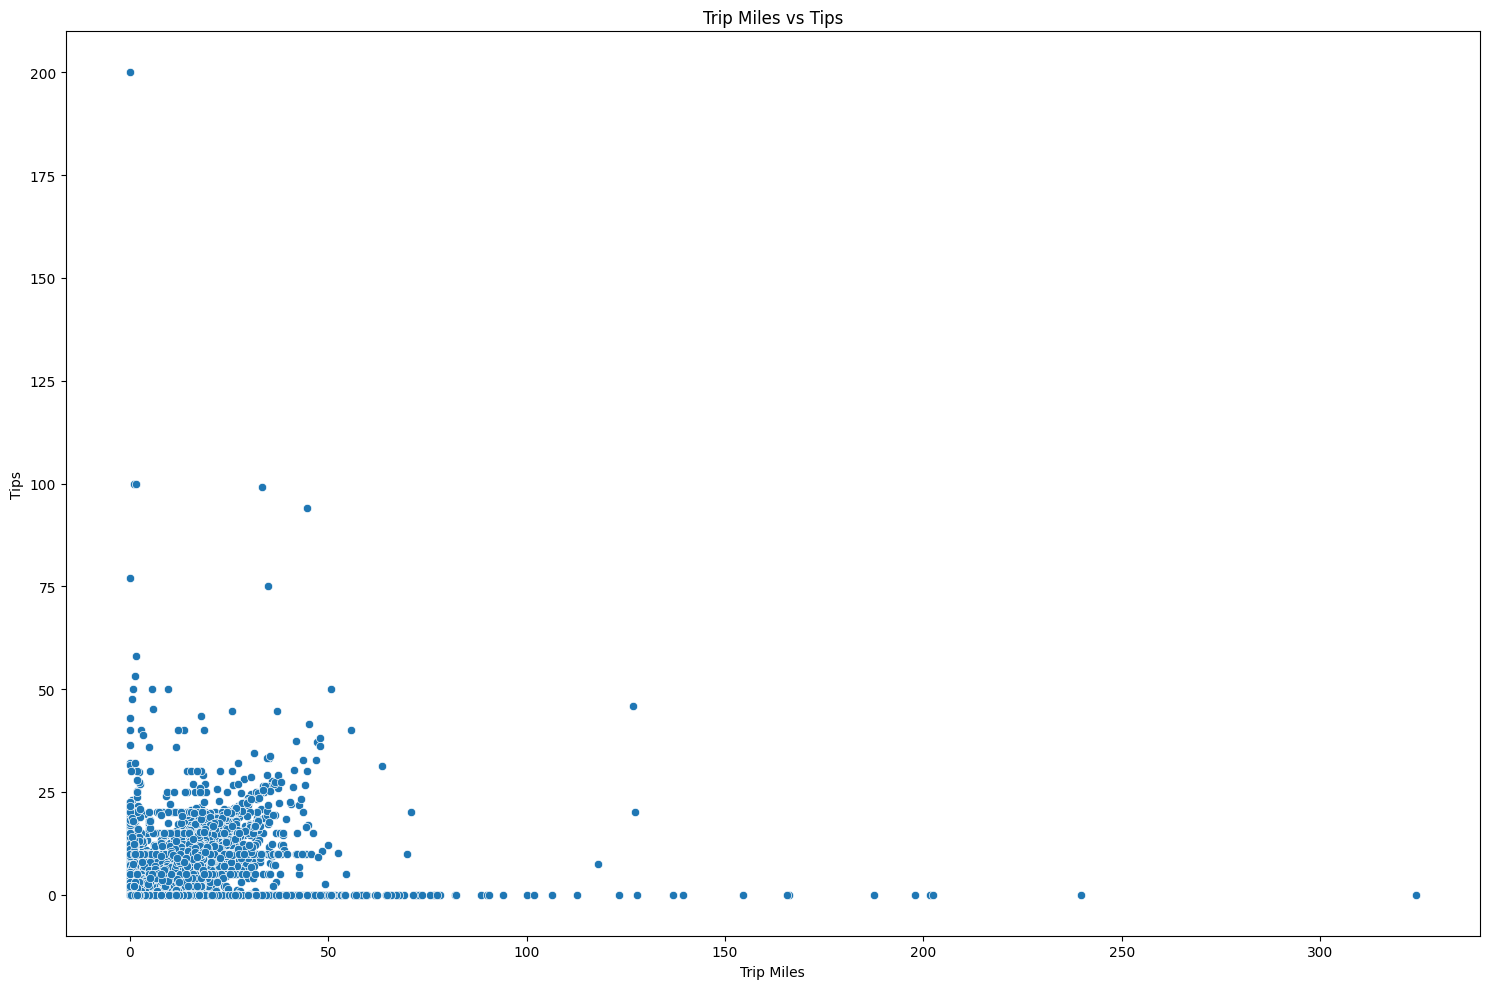

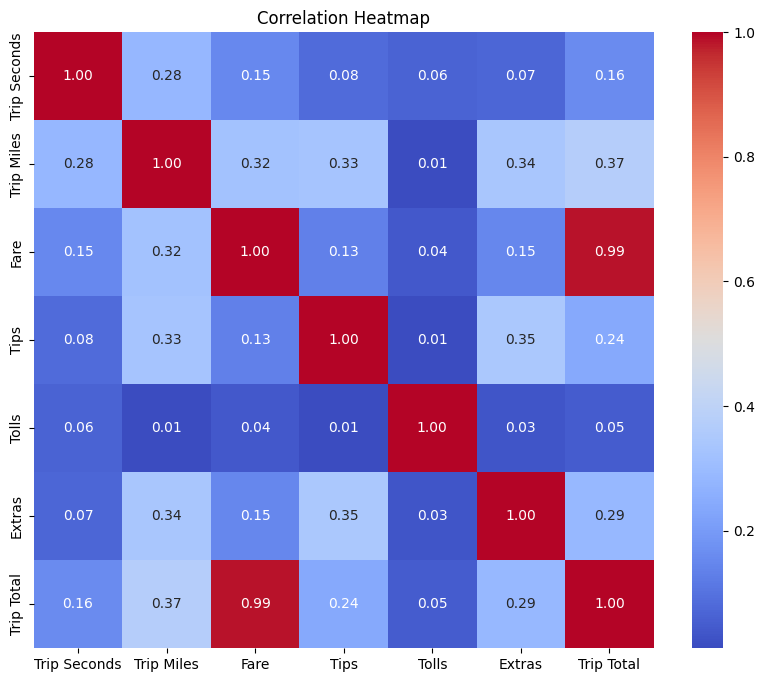

In [ ]:
# Scatter plots for numerical vs numerical relationships
plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Trip Seconds'], y=df['Fare']) # Changed 'data' to 'df'
plt.title('Trip Seconds vs Fare')

plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Trip Miles'], y=df['Fare']) # Changed 'data' to 'df'
plt.title('Trip Miles vs Fare')

plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Trip Seconds'], y=df['Tips']) # Changed 'data' to 'df'
plt.title('Trip Seconds vs Tips')

plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Trip Miles'], y=df['Tips']) # Changed 'data' to 'df'
plt.title('Trip Miles vs Tips')

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical variables
correlation_matrix = df[numerical_columns].corr() # Changed 'data' to 'df'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

2.2.2 Categorical vs Numerical Relationships

Goals:

Use box plots to visualize how numerical values vary by category.
python
Copy code


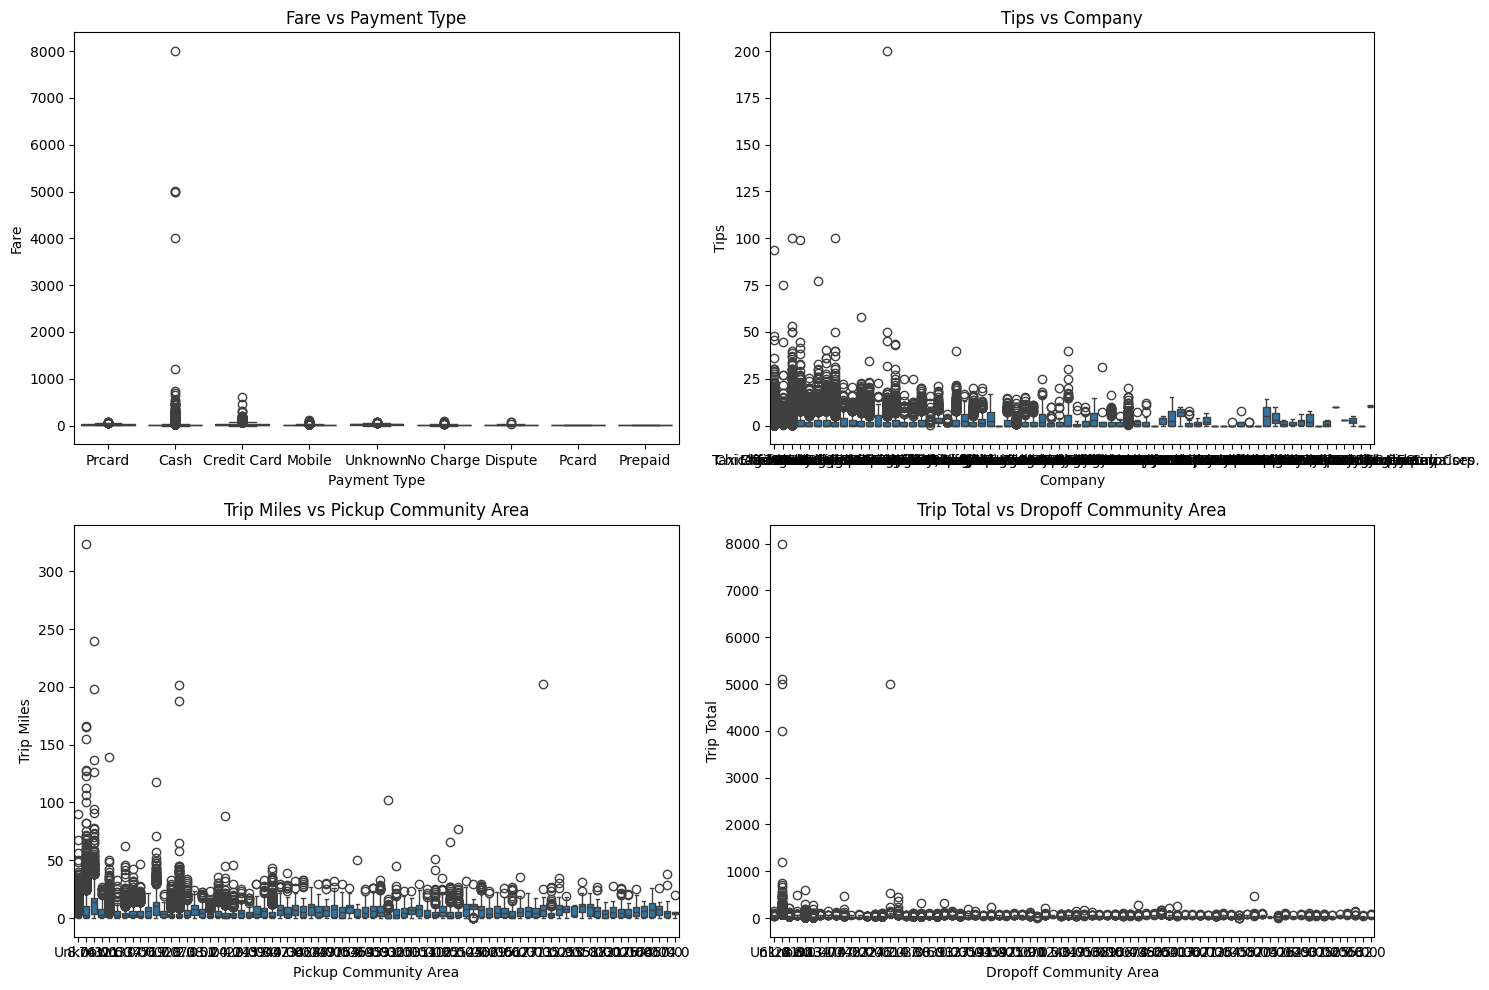

In [ ]:
# Boxplots for categorical vs numerical variables
plt.figure(figsize=(15, 10))

# Fare vs Payment Type
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Payment Type'], y=df['Fare']) # Changed 'data' to 'df'
plt.title('Fare vs Payment Type')

# Tips vs Company
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Company'], y=df['Tips']) # Changed 'data' to 'df'
plt.title('Tips vs Company')

# Trip Miles vs Pickup Community Area
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Pickup Community Area'], y=df['Trip Miles']) # Changed 'data' to 'df'
plt.title('Trip Miles vs Pickup Community Area')

# Trip Total vs Dropoff Community Area
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Dropoff Community Area'], y=df['Trip Total']) # Changed 'data' to 'df'
plt.title('Trip Total vs Dropoff Community Area')

plt.tight_layout()
plt.show()

2.3 Multivariate Analysis

2.3.1 Pairwise Relationships (Pairplot)
A pairplot allows us to visualize relationships between multiple variables at once. This will help us identify patterns, clusters, or correlations among variables like Trip Seconds, Trip Miles, Fare, Tips, and Trip Total.

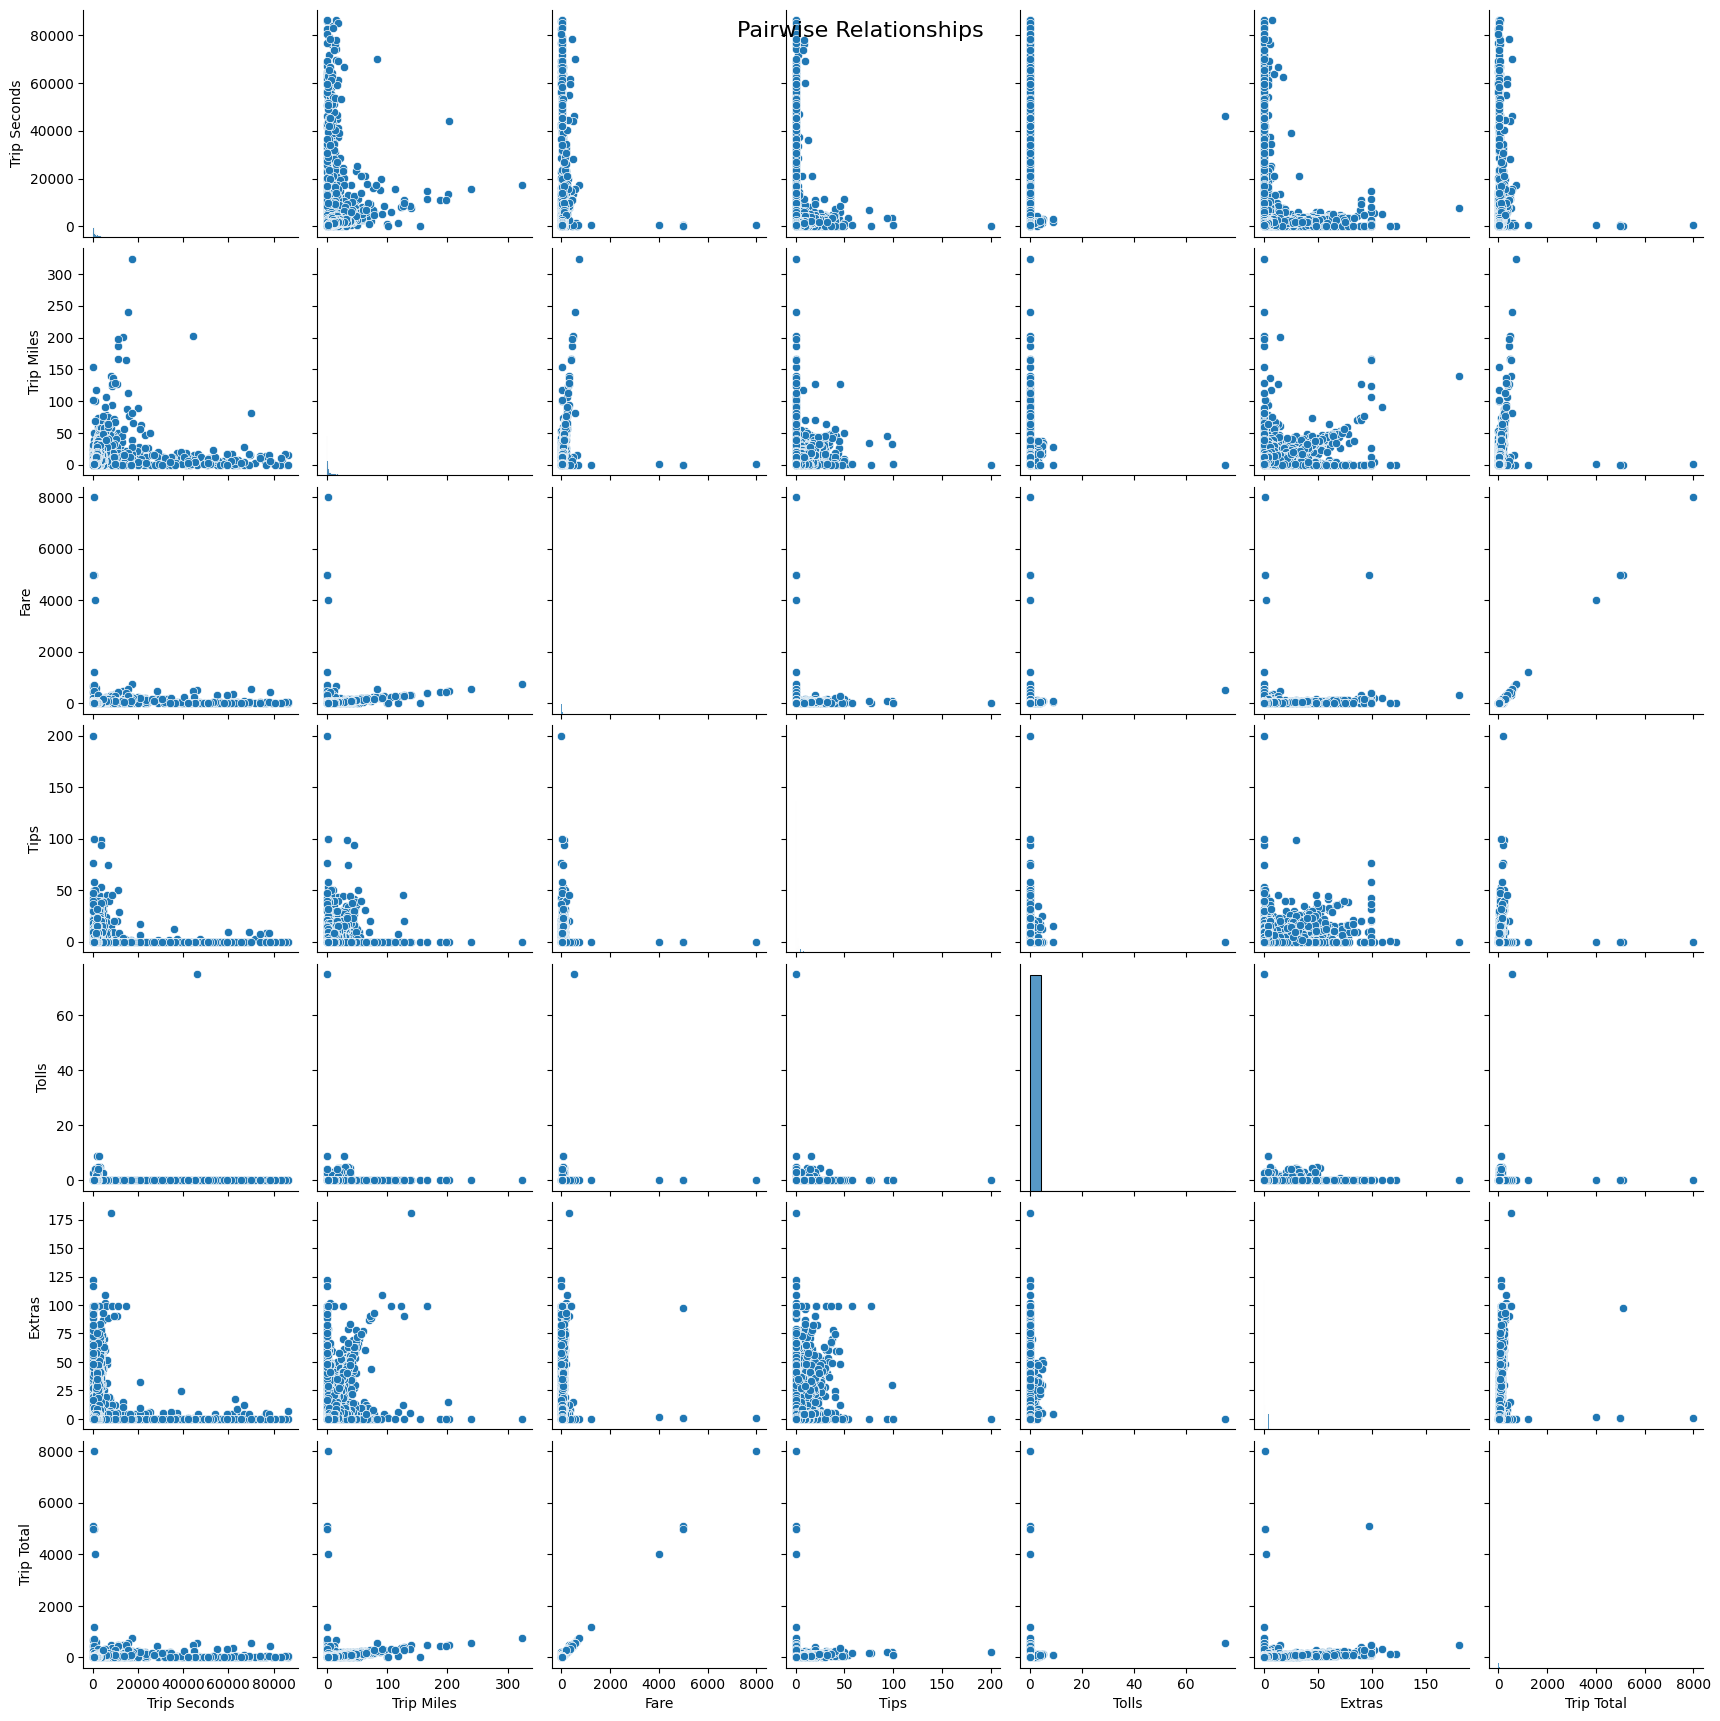

In [ ]:
# Pairplot for numerical variables
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairwise Relationships", size=16)
plt.show()


2.3.2 Time-based Analysis
We will extract features from the Trip Start Timestamp to analyze how trips vary by time of day, day of week, or month.

Goals:

Examine trip patterns during different times of the day.
Look at the number of trips or average fare across different times.

<ipython-input-34-3c0fa88ee1d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Hour of Day'], palette='viridis') # Changed 'data' to 'df'


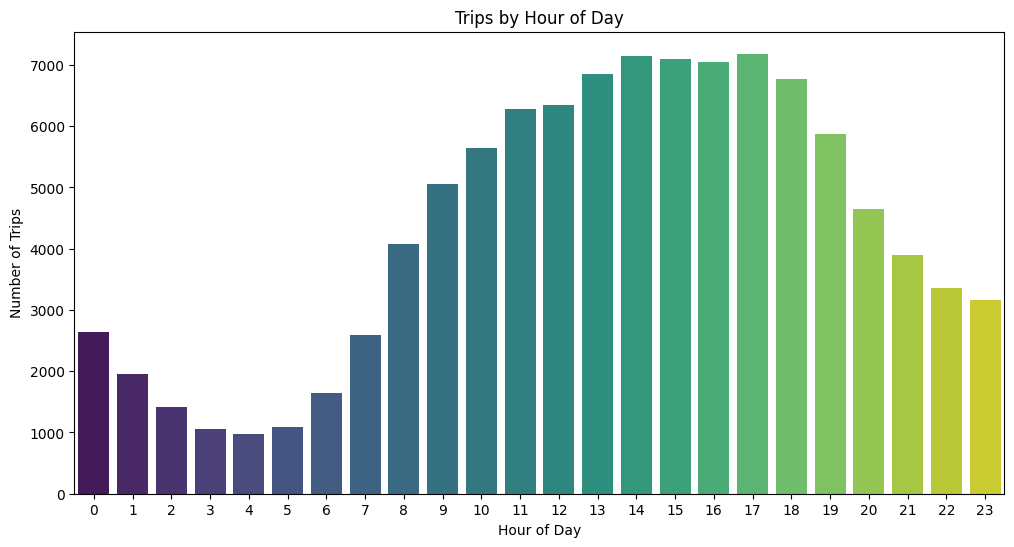

<ipython-input-34-3c0fa88ee1d5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Hour of Day'], y=df['Fare'], palette='viridis') # Changed 'data' to 'df'


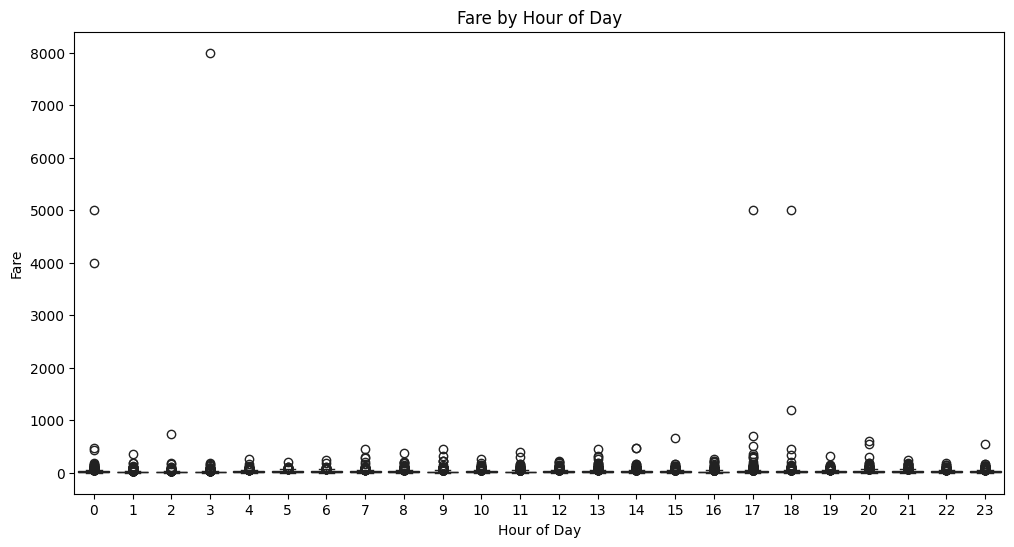

<ipython-input-34-3c0fa88ee1d5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Day of Week'], y=df['Tips'], palette='viridis') # Changed 'data' to 'df'


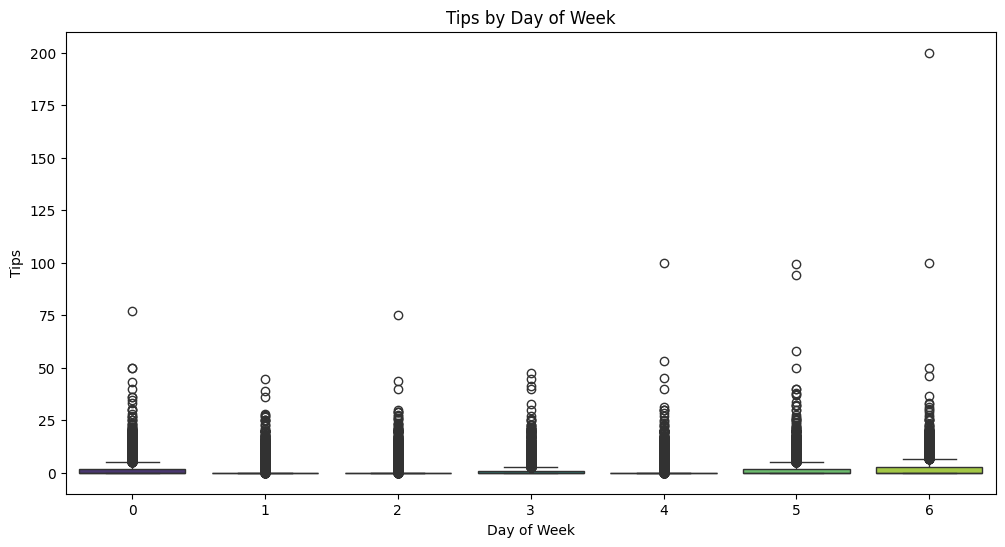

In [ ]:
# Extract time-based features
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp']) # Changed 'data' to 'df'
df['Hour of Day'] = df['Trip Start Timestamp'].dt.hour # Changed 'data' to 'df'
df['Day of Week'] = df['Trip Start Timestamp'].dt.dayofweek # Changed 'data' to 'df'
df['Month'] = df['Trip Start Timestamp'].dt.month # Changed 'data' to 'df'

# Analyze trips by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Hour of Day'], palette='viridis') # Changed 'data' to 'df'
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# Analyze average fare by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Hour of Day'], y=df['Fare'], palette='viridis') # Changed 'data' to 'df'
plt.title('Fare by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare')
plt.show()

# Analyze average tips by day of week
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Day of Week'], y=df['Tips'], palette='viridis') # Changed 'data' to 'df'
plt.title('Tips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Tips')
plt.show()

Step 3: Feature Engineering

3.1.1 Extract Hour, Day, and Month

We can extract:

Hour of the day: Indicates peak times for trips.
Day of the week: Helps identify weekdays vs weekends trends.
Month: Shows seasonal variations in trips

In [ ]:
# Convert 'Trip Start Timestamp' to datetime if not already done
df['Trip Start Timestamp'] = pd.to_datetime(df['Trip Start Timestamp']) # Changed 'data' to 'df'
df['Trip End Timestamp'] = pd.to_datetime(df['Trip End Timestamp']) # Changed 'data' to 'df'

# Extract additional time-based features
df['Hour of Day'] = df['Trip Start Timestamp'].dt.hour # Changed 'data' to 'df'
df['Day of Week'] = df['Trip Start Timestamp'].dt.dayofweek # Changed 'data' to 'df'
df['Month'] = df['Trip Start Timestamp'].dt.month # Changed 'data' to 'df'
df['Weekday/Weekend'] = df['Trip Start Timestamp'].dt.weekday < 5  # True for weekdays, False for weekends
df['Trip Duration'] = (df['Trip End Timestamp'] - df['Trip Start Timestamp']).dt.total_seconds() # Changed 'data' to 'df'

# Check for the new features
df[['Trip Start Timestamp', 'Trip End Timestamp', 'Hour of Day', 'Day of Week', 'Month', 'Weekday/Weekend', 'Trip Duration']].head() # Changed 'data' to 'df'

,Trip Start Timestamp,Trip End Timestamp,Hour of Day,Day of Week,Month,Weekday/Weekend,Trip Duration
0,2021-03-31 15:00:00,2021-03-31 15:30:00,15,2,3,True,1800.0
1,2014-07-11 10:00:00,2014-07-11 10:15:00,10,4,7,True,900.0
2,2021-03-31 14:00:00,2021-03-31 14:45:00,14,2,3,True,2700.0
3,2021-03-31 17:00:00,2021-03-31 17:15:00,17,2,3,True,900.0
4,2021-03-31 07:15:00,2021-03-31 07:30:00,7,2,3,True,900.0


3.1.2 Handle Missing or Erroneous Timestamps
Ensure that there are no missing or incorrect timestamp entries (e.g., trips without an end time, or end time before start time).

In [ ]:
# Handle missing or erroneous timestamps
df = df.dropna(subset=['Trip Start Timestamp', 'Trip End Timestamp'])

# Filter out rows where the 'Trip End Timestamp' is earlier than 'Trip Start Timestamp'
df = df[df['Trip Duration'] > 0]

# Check if any invalid trip durations remain
df['Trip Duration'].describe()

,Trip Duration
count,72360.000000
mean,1543.109453
std,4066.499094
min,900.000000
25%,900.000000
50%,900.000000
75%,1800.000000
max,507600.000000


3.2 Trip-related Features
We can derive additional features from existing columns, like:

Trip Duration to Distance Ratio: A feature that represents the average speed during a trip (distance per second).
Fare per Mile: A metric to analyze the fare relative to the distance traveled.
Tip per Mile: Understanding if tips are influenced by the distance of the trip.


3.2.1 Create Derived Features

In [ ]:
# Add derived features
df['Duration to Distance Ratio'] = df['Trip Duration'] / df['Trip Miles']
df['Fare per Mile'] = df['Fare'] / df['Trip Miles']
df['Tip per Mile'] = df['Tips'] / df['Trip Miles']

# Check the first few rows of the new features
df[['Trip Duration', 'Trip Miles', 'Fare', 'Tips', 'Duration to Distance Ratio', 'Fare per Mile', 'Tip per Mile']].head(10)

,Trip Duration,Trip Miles,Fare,Tips,Duration to Distance Ratio,Fare per Mile,Tip per Mile
0,1800.0,11.05,30.25,0.0,162.895928,2.737557,0.0
1,900.0,3.30,10.85,0.0,272.727273,3.287879,0.0
2,2700.0,1.00,43.25,5.0,2700.000000,43.250000,5.0
3,900.0,0.50,8.25,0.0,1800.000000,16.500000,0.0
4,900.0,1.08,6.25,0.0,833.333333,5.787037,0.0


In [ ]:
df[['Trip Duration', 'Trip Miles', 'Fare', 'Tips', 'Duration to Distance Ratio', 'Fare per Mile', 'Tip per Mile']].head(10)

,Trip Duration,Trip Miles,Fare,Tips,Duration to Distance Ratio,Fare per Mile,Tip per Mile
0,1800.0,11.05,30.25,0.00,162.895928,2.737557,0.000000
1,900.0,3.30,10.85,0.00,272.727273,3.287879,0.000000
2,2700.0,1.00,43.25,5.00,2700.000000,43.250000,5.000000
3,900.0,0.50,8.25,0.00,1800.000000,16.500000,0.000000
4,900.0,1.08,6.25,0.00,833.333333,5.787037,0.000000
8,900.0,3.50,12.50,0.00,257.142857,3.571429,0.000000
9,900.0,1.00,5.50,1.00,900.000000,5.500000,1.000000
10,900.0,1.10,6.25,0.00,818.181818,5.681818,0.000000
11,3600.0,17.02,44.25,9.85,211.515864,2.599882,0.578731
12,900.0,2.05,8.75,0.00,439.024390,4.268293,0.000000


3.2.2 Handle Division by Zero or Missing Values
Ensure that there are no divisions by zero or missing values in the new features.

In [ ]:
# Handle possible division by zero errors or missing values
df['Duration to Distance Ratio'] = df['Duration to Distance Ratio'].replace([np.inf, -np.inf], np.nan)
df['Fare per Mile'] = df['Fare per Mile'].replace([np.inf, -np.inf], np.nan)
df['Tip per Mile'] = df['Tip per Mile'].replace([np.inf, -np.inf], np.nan)

# Fill NaN values with reasonable default (e.g., median or mean)
df['Duration to Distance Ratio'].fillna(df['Duration to Distance Ratio'].median(), inplace=True)
df['Fare per Mile'].fillna(df['Fare per Mile'].median(), inplace=True)
df['Tip per Mile'].fillna(df['Tip per Mile'].median(), inplace=True)

# Verify the changes
df[['Duration to Distance Ratio', 'Fare per Mile', 'Tip per Mile']].describe()

<ipython-input-43-4131b8f802fa>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration to Distance Ratio'].fillna(df['Duration to Distance Ratio'].median(), inplace=True)
<ipython-input-43-4131b8f802fa>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

,Duration to Distance Ratio,Fare per Mile,Tip per Mile
count,7.236000e+04,72360.000000,72360.000000
mean,9.508522e+02,9.504418,0.562440
std,1.500191e+04,87.950883,2.782163
min,5.821475e+00,0.000000,0.000000
25%,1.508169e+02,2.738095,0.000000
50%,2.631579e+02,3.371202,0.000000
75%,5.294118e+02,4.821429,0.420168
max,3.105000e+06,17387.500000,146.500000


3.3 Categorical Encoding

In [ ]:
# One-hot encode categorical variables like 'Payment Type' and 'Company'
df = pd.get_dummies(df, columns=['Payment Type', 'Company'], drop_first=True) # Changed 'data' to 'df'

# Verify the new encoded columns
df.head() # Changed 'data' to 'df'

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Company_Sun Taxi,Company_T.A.S. - Payment Only,Company_Taxi Affiliation Service Yellow,Company_Taxi Affiliation Services,Company_Taxicab Insurance Agency Llc,"Company_Taxicab Insurance Agency, LLC",Company_Top Cab,Company_Top Cab Affiliation,Company_U Taxicab,Company_Unknown
0,2456abbd77d39361183d4189599999b266e975da,774404e103b0efff86c009f1f384bff4e09c0aba9d20f6...,2021-03-31 15:00:00,2021-03-31 15:30:00,1699.0,11.05,Unknown,Unknown,8.0,61.0,...,False,False,False,False,False,False,False,False,False,False
1,d5307cd921b4edc5038ba79c163c5a7f3f642a6a,dd44f2759f7aeb03f89d7c29d03a7268d80c4e193d555f...,2014-07-11 10:00:00,2014-07-11 10:15:00,780.0,3.30,Unknown,Unknown,Unknown,Unknown,...,False,False,False,False,False,False,False,False,False,True
2,246d363a62dfb9b9573cb31a0e8251d52f864225,8de0e6d62efb41e049bcc13474cd662275376b7fbdc435...,2021-03-31 14:00:00,2021-03-31 14:45:00,2160.0,1.00,17031980000.0,17031281900.0,76.0,28.0,...,False,False,False,True,False,False,False,False,False,False
3,2470347ef545fad85ab54cc1c9918126b3e1c25f,3ec761bcbdf1b66135e7f4bf23e1b100d6e4f933e32a76...,2021-03-31 17:00:00,2021-03-31 17:15:00,840.0,0.50,Unknown,Unknown,41.0,41.0,...,False,False,False,True,False,False,False,False,False,False
4,2477c00420b0bdc1afc106ae685b10862b1fd8e0,52b413067437984fbc09298bfd9f8c6a7ad9465fb071ae...,2021-03-31 07:15:00,2021-03-31 07:30:00,311.0,1.08,Unknown,Unknown,8.0,8.0,...,True,False,False,False,False,False,False,False,False,False


3.3.2 Label Encoding for Ordinal Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure 'Pickup Community Area' and 'Dropoff Community Area' are of type string
# before applying Label Encoding
df['Pickup Community Area'] = df['Pickup Community Area'].astype(str)
df['Dropoff Community Area'] = df['Dropoff Community Area'].astype(str)

# Label encoding for 'Pickup Community Area' and 'Dropoff Community Area'
label_encoder = LabelEncoder()

# Apply label encoding
df['Pickup Community Area'] = label_encoder.fit_transform(df['Pickup Community Area'])
df['Dropoff Community Area'] = label_encoder.fit_transform(df['Dropoff Community Area'])

# Verify the encoded columns
df[['Pickup Community Area', 'Dropoff Community Area']].head()

,Pickup Community Area,Dropoff Community Area
0,75,57
1,77,77
2,73,20
3,35,35
4,75,75


3.4.1 Handle Missing Values

In [ ]:
# Check for missing values in the dataset
missing_data = df.isnull().sum()

# Decide on filling or dropping missing values
# For example, fill 'Fare' and 'Tips' with median values if they are missing
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Tips'].fillna(df['Tips'].median(), inplace=True)
df['Tolls'].fillna(df['Tolls'].median(), inplace=True)

# Drop rows with remaining crucial missing values, if necessary
df.dropna(subset=['Trip Total'], inplace=True)

# Check if there are any remaining missing values
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

<ipython-input-50-aeff188ffca9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)
<ipython-input-50-aeff188ffca9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
Taxi ID,3
Pickup Centroid Latitude,13611
Pickup Centroid Longitude,13611
Pickup Centroid Location,13611
Dropoff Centroid Latitude,16443
Dropoff Centroid Longitude,16443
Dropoff Centroid Location,16443


3.5 Feature Scaling
If we plan to use machine learning models (like regression or classification) that are sensitive to the scale of the features (e.g., distance-based algorithms like KNN, or gradient descent methods like linear regression), we should scale the numeric features.

We'll use MinMax Scaling for this purpose.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMax scaling to numerical columns
scaler = MinMaxScaler()
numerical_columns_to_scale = ['Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', 'Trip Duration',
                              'Duration to Distance Ratio', 'Fare per Mile', 'Tip per Mile']
df[numerical_columns_to_scale] = scaler.fit_transform(df[numerical_columns_to_scale]) # Changed 'data' to 'df'

# Verify the scaled data
df[numerical_columns_to_scale].describe() # Changed 'data' to 'df'

,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Trip Total,Trip Duration,Duration to Distance Ratio,Fare per Mile,Tip per Mile
count,72360.000000,72360.000000,72360.000000,72360.000000,72360.000000,72360.000000,72360.000000,72360.000000,72360.000000,72360.000000,72360.000000
mean,0.015690,0.019826,0.002739,0.016780,0.000058,0.009739,0.003181,0.001269,0.000304,0.000547,0.003839
std,0.029513,0.022752,0.004731,0.034695,0.003961,0.029494,0.005006,0.008025,0.004832,0.005058,0.018991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007332,0.003703,0.001156,0.000000,0.000000,0.000000,0.001312,0.000000,0.000047,0.000157,0.000000
50%,0.011791,0.011509,0.002062,0.000000,0.000000,0.000000,0.002281,0.000000,0.000083,0.000194,0.000000
75%,0.018740,0.031688,0.003812,0.020000,0.000000,0.005525,0.004061,0.001776,0.000169,0.000277,0.002868
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


3.6 Final Data Overview
At this point, we have engineered the features that should improve our data analysis and modeling. To summarize:

We’ve extracted time-based features like hour of day, day of week, month, and trip duration.
We’ve created useful trip-related metrics, including duration-to-distance ratio and fare per mile.
We’ve encoded categorical variables.
We’ve handled missing values and scaled numerical features.

In [ ]:
df.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Company_Sun Taxi,Company_T.A.S. - Payment Only,Company_Taxi Affiliation Service Yellow,Company_Taxi Affiliation Services,Company_Taxicab Insurance Agency Llc,"Company_Taxicab Insurance Agency, LLC",Company_Top Cab,Company_Top Cab Affiliation,Company_U Taxicab,Company_Unknown
0,2456abbd77d39361183d4189599999b266e975da,774404e103b0efff86c009f1f384bff4e09c0aba9d20f6...,2021-03-31 15:00:00,2021-03-31 15:30:00,0.019655,0.034094,Unknown,Unknown,75,57,...,False,False,False,False,False,False,False,False,False,False
1,d5307cd921b4edc5038ba79c163c5a7f3f642a6a,dd44f2759f7aeb03f89d7c29d03a7268d80c4e193d555f...,2014-07-11 10:00:00,2014-07-11 10:15:00,0.009011,0.010182,Unknown,Unknown,77,77,...,False,False,False,False,False,False,False,False,False,True
2,246d363a62dfb9b9573cb31a0e8251d52f864225,8de0e6d62efb41e049bcc13474cd662275376b7fbdc435...,2021-03-31 14:00:00,2021-03-31 14:45:00,0.024995,0.003085,17031980000.0,17031281900.0,73,20,...,False,False,False,True,False,False,False,False,False,False
3,2470347ef545fad85ab54cc1c9918126b3e1c25f,3ec761bcbdf1b66135e7f4bf23e1b100d6e4f933e32a76...,2021-03-31 17:00:00,2021-03-31 17:15:00,0.009706,0.001543,Unknown,Unknown,35,35,...,False,False,False,True,False,False,False,False,False,False
4,2477c00420b0bdc1afc106ae685b10862b1fd8e0,52b413067437984fbc09298bfd9f8c6a7ad9465fb071ae...,2021-03-31 07:15:00,2021-03-31 07:30:00,0.003579,0.003332,Unknown,Unknown,75,75,...,True,False,False,False,False,False,False,False,False,False


Step 4: Relationship Analysis

We'll perform:

Correlation Analysis: To understand the strength of relationships between numeric variables.
Business Question Analysis: Using relationships to answer business-relevant questions (e.g., how does fare relate to trip distance and time?).
Feature Interactions: Exploring how combinations of features affect key outcomes.
Modeling for Predictive Insights (if applicable): This is optional but could provide further insights based on the relationships found.

4.1.1 Correlation Heatmap

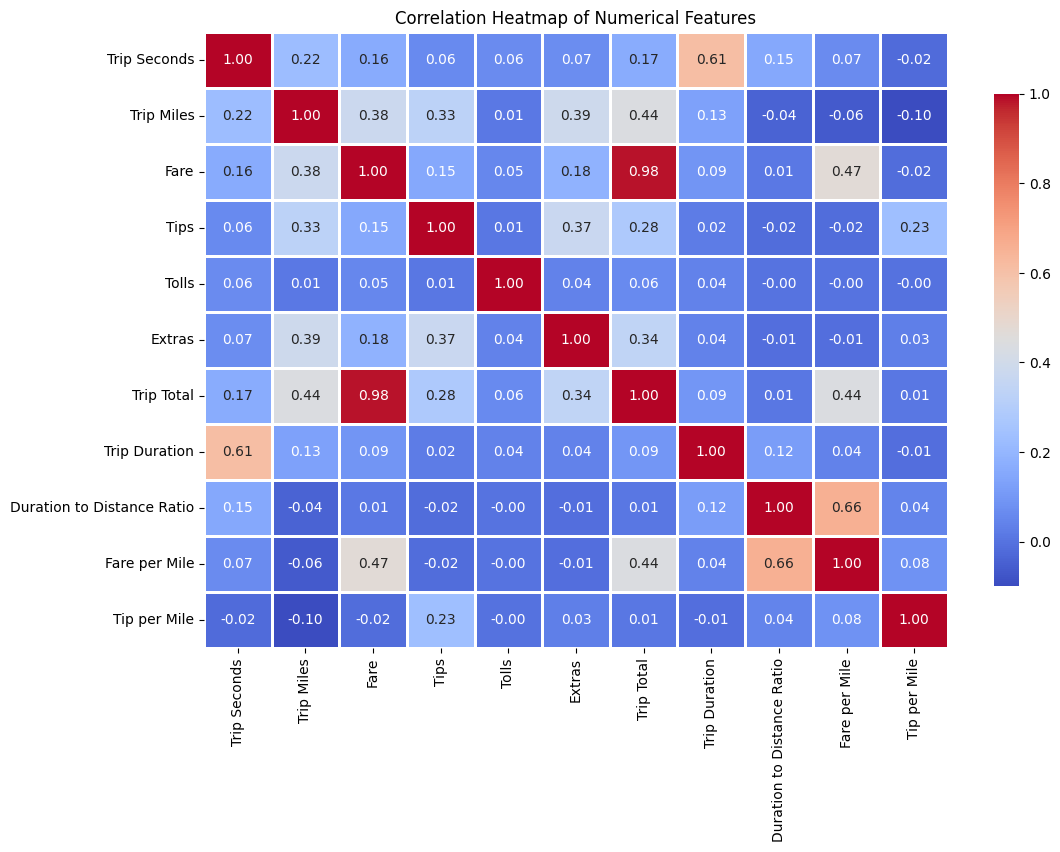

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical features
# Use 'df' instead of 'data' to access the DataFrame
correlation_matrix = df[numerical_columns_to_scale].corr()

# Plot a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

4.2 Business Question Analysis

4.2.1 How does trip duration (Trip Duration) relate to trip distance (Trip Miles) and fare (Fare)?
Hypothesis: Longer trips (greater distance and time) should have higher fares.
We can visualize this relationship using a scatter plot and check for correlation.
python
Copy code


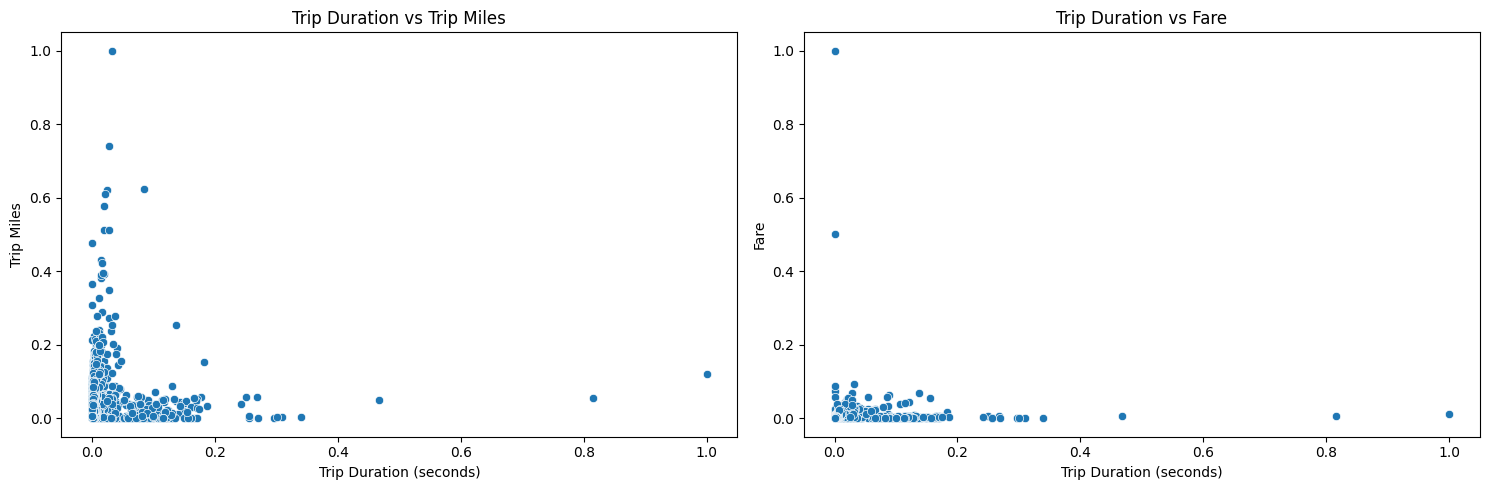

               Trip Duration  Trip Miles      Fare
Trip Duration       1.000000    0.129392  0.092587
Trip Miles          0.129392    1.000000  0.379914
Fare                0.092587    0.379914  1.000000


In [ ]:
# Scatter plots to examine the relationships between trip distance, duration, and fare
plt.figure(figsize=(15, 5))

# Trip Duration vs Trip Miles
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Trip Duration'], y=df['Trip Miles'])  # Changed 'data' to 'df'
plt.title('Trip Duration vs Trip Miles')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Miles')

# Trip Duration vs Fare
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Trip Duration'], y=df['Fare'])  # Changed 'data' to 'df'
plt.title('Trip Duration vs Fare')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

# Correlation between Trip Duration, Trip Miles, and Fare
print(df[['Trip Duration', 'Trip Miles', 'Fare']].corr())  # Changed 'data' to 'df'

4.2.2 How do tips (Tips) vary with trip distance (Trip Miles) and fare (Fare)?
Hypothesis: Longer trips and higher fares should lead to higher tips, but the tip-to-fare ratio may differ based on payment method or trip type.

In [ ]:
# Scatter plots to examine tips vs distance and fare
plt.figure(figsize=(15, 5))

# Tips vs Trip Miles
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Tips'], y=df['Trip Miles'])  # Changed 'data' to 'df'
plt.title('Tips vs Trip Miles')
plt.xlabel('Trip Miles')
plt.ylabel('Tips')

# Tips vs Fare
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Fare'], y=df['Tips'])  # Changed 'data' to 'df'
plt.title('Tips vs Fare')
plt.xlabel('Fare')
plt.ylabel('Tips')

plt.tight_layout()
plt.show()

# Correlation between Tips, Trip Miles, and Fare
print(df[['Trip Miles', 'Fare', 'Tips']].corr())

NameError: name 'plt' is not defined

What we expect:

Tips vs Trip Miles: A positive correlation (greater distances often lead to higher tips).
Tips vs Fare: A positive correlation (higher fares often result in higher tips, but there might be exceptions).

4.2.3 What is the relationship between payment method (Payment Type) and tips (Tips)?

Hypothesis: Different payment methods (e.g., cash vs card) could influence tip behavior.

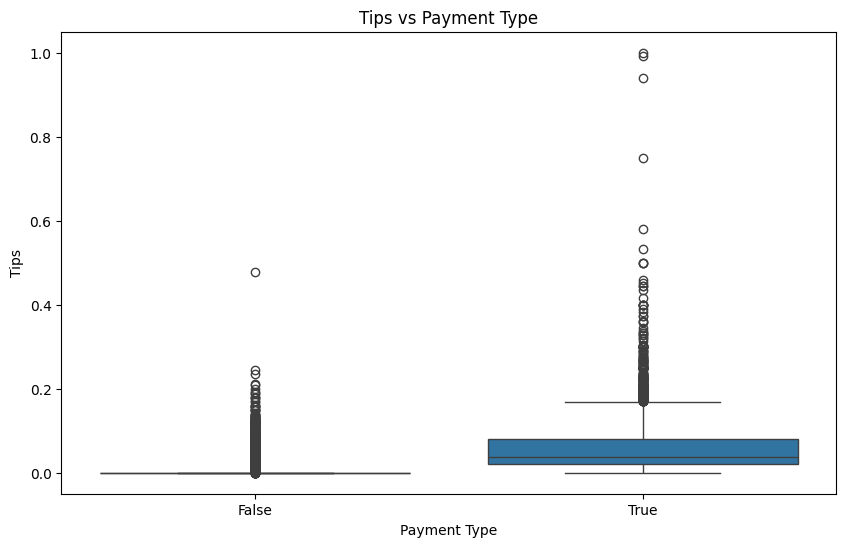

Payment Type_Credit Card
False    0.001779
True     0.050945
Name: Tips, dtype: float64


In [ ]:
# Box plot to check the relationship between Payment Type and Tips
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Payment Type_Credit Card'], y=df['Tips'])  # Changed 'data' to 'df'
plt.title('Tips vs Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Tips')
plt.show()

# Grouping by Payment Type and calculating average tips
avg_tips_by_payment = df.groupby('Payment Type_Credit Card')['Tips'].mean()  # Changed 'data' to 'df'
print(avg_tips_by_payment)

What we expect:

Different payment methods may yield different average tips. For instance, cash payments might lead to higher tips due to customer behavior, or tips could be lower for credit card payments due to convenience.

4.3 Feature Interactions
To explore interactions between multiple features, we'll use pairwise visualizations or interaction plots.

4.3.1 Interaction between Trip Duration, Trip Miles, and Fare
We can explore the interaction between Trip Duration, Trip Miles, and Fare using a 3D plot or a pairplot.

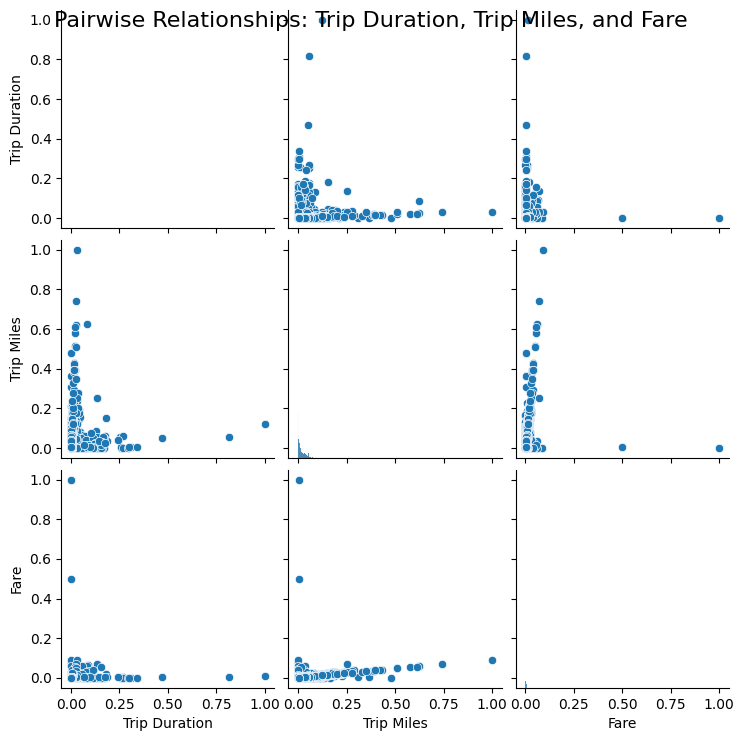

In [ ]:
# Pairplot to examine interactions between Trip Duration, Trip Miles, and Fare
sns.pairplot(df[['Trip Duration', 'Trip Miles', 'Fare']]) # Changed 'data' to 'df'
plt.suptitle('Pairwise Relationships: Trip Duration, Trip Miles, and Fare', size=16)
plt.show()

4.4 Model Building for Predictive Insights (Optional)
If we want to predict outcomes (e.g., Fare, Tips, Trip Duration), we can build machine learning models. This will help in understanding the strength of relationships quantitatively.

4.4.1 Linear Regression Model (for Fare Prediction)
For instance, we could build a linear regression model to predict Fare based on various features like Trip Duration, Trip Miles, etc.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df[['Trip Duration', 'Trip Miles', 'Hour of Day', 'Day of Week', 'Month', 'Fare per Mile', 'Tip per Mile']] # Changed 'data' to 'df'
y = df['Fare'] # Changed 'data' to 'df'

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 1.2840896106107494e-05
R-Squared: 0.4247325827206653


4.4.2 Model Interpretation
The model's coefficients will tell us how each feature (e.g., Trip Duration, Trip Miles) influences the fare prediction.
We can also use feature importance to understand which features are most predictive of the target

Step 5: Model Building & Evaluation
In Step 5: Model Building & Evaluation, we focus on developing predictive models that can provide valuable business insights and forecasting. Given the nature of the data, we can predict variables such as Fare, Tips, or Trip Duration.

We'll go through the following steps:

Feature Selection: Determine which features are most relevant for model building.
Model Building: Train multiple machine learning models (e.g., Linear Regression, Random Forest, XGBoost).
Model Evaluation: Assess the model performance using appropriate metrics (e.g., RMSE, R², MAE).
Model Tuning & Hyperparameter Optimization: Optionally, fine-tune the models to improve performance.
We'll focus on predicting Fare as the target variable since it is a primary business metric, and explore how various features (e.g., Trip Duration, Trip Miles, etc.) affect it.

5.1 Feature Selection
Before building the models, we need to decide which features should be used to predict the target variable (Fare).

From our earlier analysis, we know that Trip Duration, Trip Miles, Hour of Day, and other trip-related features might be influential in predicting fare.

We'll first define our features (X) and target (y), and then proceed with model building.

In [ ]:
# Define features and target variable
X = df[['Trip Duration', 'Trip Miles', 'Hour of Day', 'Day of Week', 'Month', 'Fare per Mile', 'Tip per Mile',
          'Pickup Community Area', 'Dropoff Community Area']]  # Select the most important features
y = df['Fare']  # Target variable: Fare

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of the train/test split
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (57888, 9)
Testing data shape: (14472, 9)


5.2 Model Building
Now we will build and train three different models:

Linear Regression: A simple baseline model for regression tasks.
Random Forest Regressor: A powerful ensemble method.
XGBoost: A gradient boosting method known for its predictive power.
5.2.1 Linear Regression Model
Linear regression will provide a baseline model. It's interpretable and will help us understand the basic relationship between features and Fare.

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lin_reg_model = LinearRegression()

# Train the model
lin_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lin_reg = lin_reg_model.predict(X_test)

# Model evaluation (R² and RMSE)
from sklearn.metrics import mean_squared_error, r2_score
lin_reg_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg)

print(f'Linear Regression - RMSE: {lin_reg_rmse}')
print(f'Linear Regression - R²: {lin_reg_r2}')


Linear Regression - RMSE: 0.003583074105983292
Linear Regression - R²: 0.42484350916878233


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.2.2 Random Forest Regressor
Random Forest is a robust ensemble learning method that can handle non-linear relationships. It's useful when the relationships between features and target are more complex.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation (RMSE and R²)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest - RMSE: {rf_rmse}')
print(f'Random Forest - R²: {rf_r2}')


Random Forest - RMSE: 0.004176337116123948
Random Forest - R²: 0.2186141539192371


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.2.3 XGBoost Regressor
XGBoost is a popular model for structured/tabular data and has been successful in a variety of regression tasks due to its gradient boosting framework.

In [ ]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation (RMSE and R²)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f'XGBoost - RMSE: {xgb_rmse}')
print(f'XGBoost - R²: {xgb_r2}')


XGBoost - RMSE: 0.0062225628600426535
XGBoost - R²: -0.7346546693305713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.3 Model Evaluation
Now that we have trained three different models, we will compare their performance based on the following metrics:

RMSE (Root Mean Squared Error): This metric tells us how much error there is in the model's predictions on average. A lower RMSE indicates a better fit.
R² (Coefficient of Determination): This tells us how much variance in the target variable is explained by the model. An R² value closer to 1 indicates a better fit.
We'll print the RMSE and R² values for each model:

In [ ]:
# Print evaluation metrics for each model
print(f"Linear Regression RMSE: {lin_reg_rmse:.2f}, R²: {lin_reg_r2:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")
print(f"XGBoost RMSE: {xgb_rmse:.2f}, R²: {xgb_r2:.2f}")


Linear Regression RMSE: 0.00, R²: 0.42
Random Forest RMSE: 0.00, R²: 0.22
XGBoost RMSE: 0.01, R²: -0.73


Interpretation:

The model with the lowest RMSE and the highest R² will be our best-performing model.
In most cases, Random Forest and XGBoost should outperform Linear Regression, especially if the relationships between features and target are complex.

5.4 Model Tuning & Hyperparameter Optimization (Optional)
After selecting the best model, you may want to optimize its hyperparameters for better performance. This can be done using Grid Search or Randomized Search.

Here is an example of how you could tune a Random Forest model using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize RandomForestRegressor
rf_model_tune = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model_tune, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters and model performance
print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluation of tuned model
best_rf_rmse = mean_squared_error(y_test, y_pred_best_rf, squared=False)
best_rf_r2 = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - RMSE: {best_rf_rmse}")
print(f"Tuned Random Forest - R²: {best_rf_r2}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest - RMSE: 0.003941911662597285
Tuned Random Forest - R²: 0.3038734151513046


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5.5 Model Interpretation and Business Insights
Once you have the best-performing model, you can interpret the results to derive business insights. For example, if you're using a Random Forest or XGBoost model, you can examine feature importance to understand which factors most strongly impact the Fare:

In [ ]:
# Get feature importance from Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Fare')
plt.show()

# Display top features
print(feature_importance_df.head())


Interpretation:

Features with the highest importance will be the ones most strongly influencing the fare prediction (e.g., Trip Duration, Trip Miles).
Business decisions, such as pricing models, could be refined by focusing on these critical features.